In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Import the CSV Data as Pandas DataFrame**

In [2]:
df= pd.read_csv('Data\data.csv')


**Show Top 5 Records**

In [3]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


Shape of dataset

In [4]:
df.shape

(334, 15)

**Dataset Information** 
* Age: Age of patients 
* tumore stage: refers to the extent of the disease, including the size of the tumor and whether it has spread to other parts of the body.
* Protein: intake is crucial for cancer patients, as it plays a significant role in maintaining muscle mass, supporting immune function, and aiding in tissue repair.
* involves examining tissues and cells under a microscope to understand their composition 
* surgery type :  crucial component of cancer treatment, aiming to remove cancerous tissue from the body 
 

**Data Checks to perform**
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

check missing values 

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

* we have 17 missing values in date of lase visit column, and 13  missing value on patient status 

In [6]:
#check duplicates  
df.duplicated().sum()


0

* There are no duplicates values in the data set

**Check data types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

Checking the number of unique values of each column

In [8]:
df.nunique()

Age                    57
Gender                  2
Protein1              333
Protein2              334
Protein3              334
Protein4              333
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       181
Date_of_Last_Visit    285
Patient_Status          2
dtype: int64

In [9]:
#Check statistics of dataset
df.describe()


,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


# EDA

In [10]:
#change type od date 
df['Date_of_Surgery'] = pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit'] = pd.to_datetime(df['Date_of_Last_Visit'])


In [11]:
#Delete null values 
df =  df.dropna(axis=0) 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 317 non-null    int64         
 1   Gender              317 non-null    object        
 2   Protein1            317 non-null    float64       
 3   Protein2            317 non-null    float64       
 4   Protein3            317 non-null    float64       
 5   Protein4            317 non-null    float64       
 6   Tumour_Stage        317 non-null    object        
 7   Histology           317 non-null    object        
 8   ER status           317 non-null    object        
 9   PR status           317 non-null    object        
 10  HER2 status         317 non-null    object        
 11  Surgery_type        317 non-null    object        
 12  Date_of_Surgery     317 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]
 14 

In [13]:
#after remove null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 317 non-null    int64         
 1   Gender              317 non-null    object        
 2   Protein1            317 non-null    float64       
 3   Protein2            317 non-null    float64       
 4   Protein3            317 non-null    float64       
 5   Protein4            317 non-null    float64       
 6   Tumour_Stage        317 non-null    object        
 7   Histology           317 non-null    object        
 8   ER status           317 non-null    object        
 9   PR status           317 non-null    object        
 10  HER2 status         317 non-null    object        
 11  Surgery_type        317 non-null    object        
 12  Date_of_Surgery     317 non-null    datetime64[ns]
 13  Date_of_Last_Visit  317 non-null    datetime64[ns]
 14 

In [14]:
df.describe(include='object').T

,count,unique,top,freq
Gender,317,2,FEMALE,313
Tumour_Stage,317,3,II,180
Histology,317,3,Infiltrating Ductal Carcinoma,224
ER status,317,1,Positive,317
PR status,317,1,Positive,317
HER2 status,317,2,Negative,288
Surgery_type,317,4,Other,97
Patient_Status,317,2,Alive,255


# Eda using Visiualization

Text(0.5, 0, 'Patient Status')

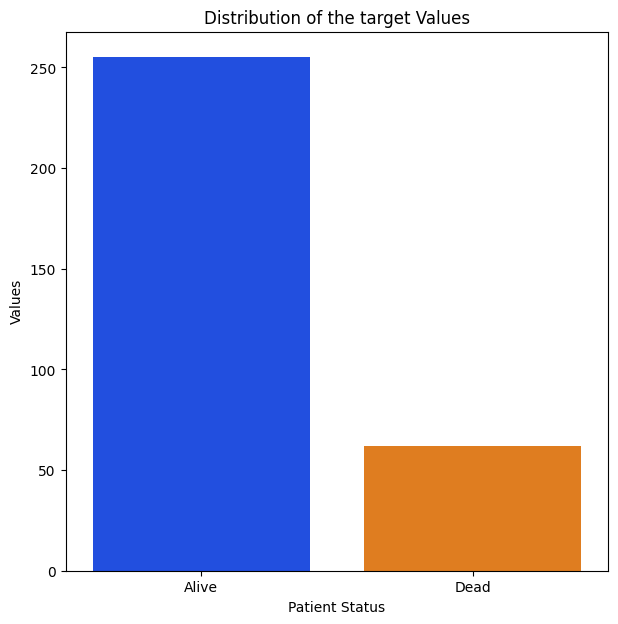

In [15]:
plt.figure(figsize=(7,7))
ax =sns.barplot(x =df.Patient_Status.value_counts().keys(),y = df.Patient_Status.value_counts(),palette='bright')
plt.title('Distribution of the target Values')
ax.set_ylabel('Values')
ax.set_xlabel('Patient Status')


Text(0.5, 1.0, 'Patients Gender')

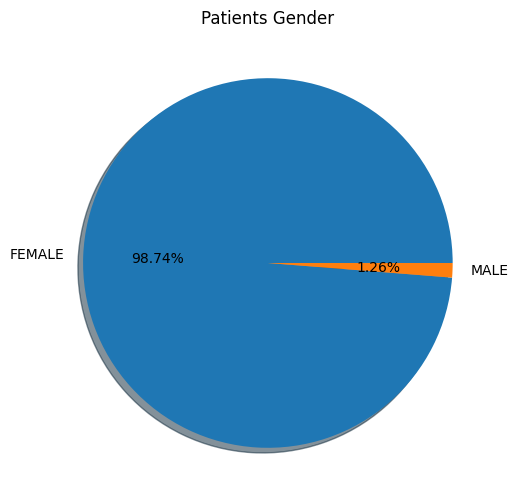

In [16]:
palatte_color = sns.color_palette('tab10')
plt.figure(figsize=(6,6))
plt.pie(x = df['Gender'].value_counts(),autopct='%.2f%%',labels=df['Gender'].value_counts().keys(),colors=palatte_color,shadow=True,)
plt.title('Patients Gender')

* Female are more susceptobale to have breast concer
* men are almost 1.5% from the population of dataset 


Text(0.5, 1.0, 'the Spread of Tumor stages ')

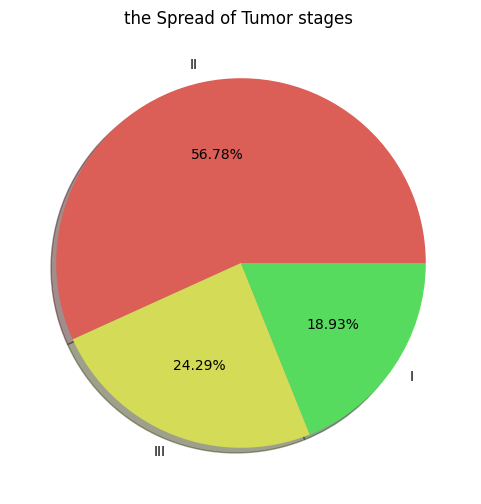

In [17]:
palatte_color = sns.color_palette('hls')
plt.figure(figsize=(6,6))
plt.pie(x = df['Tumour_Stage'].value_counts(),autopct='%.2f%%',labels=df['Tumour_Stage'].value_counts().keys(),
        colors=palatte_color,shadow=True,)
plt.title('the Spread of Tumor stages ')

* the diseas in his stage two is the most spread  between the patients 

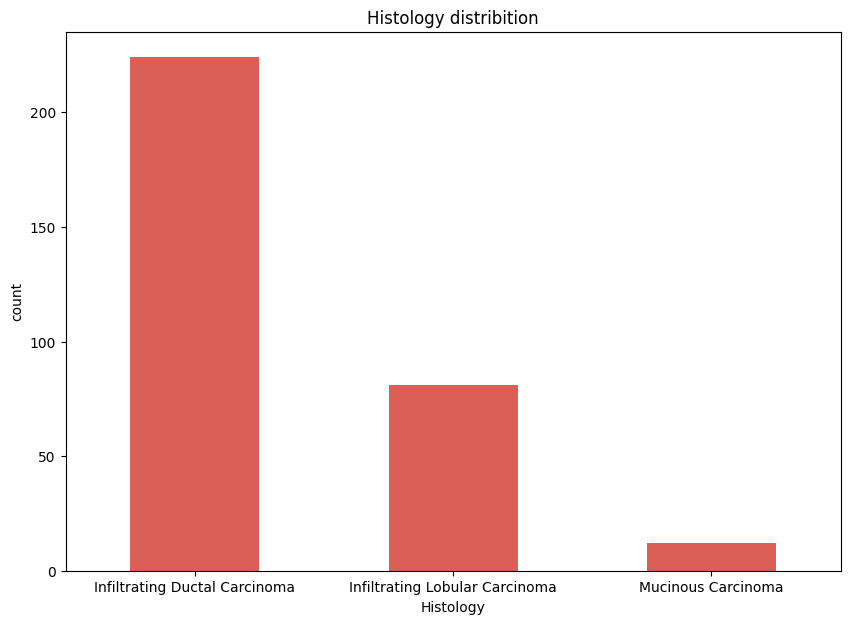

In [43]:
color = sns.set_palette('hls')
plot = df['Histology'].value_counts().plot(kind='bar',figsize=(10,7),color=color)
plt.title('Histology distribition')
plt.ylabel('count')
for items in plot.axes.get_xticklabels():
    items.set_rotation(0)

In [44]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


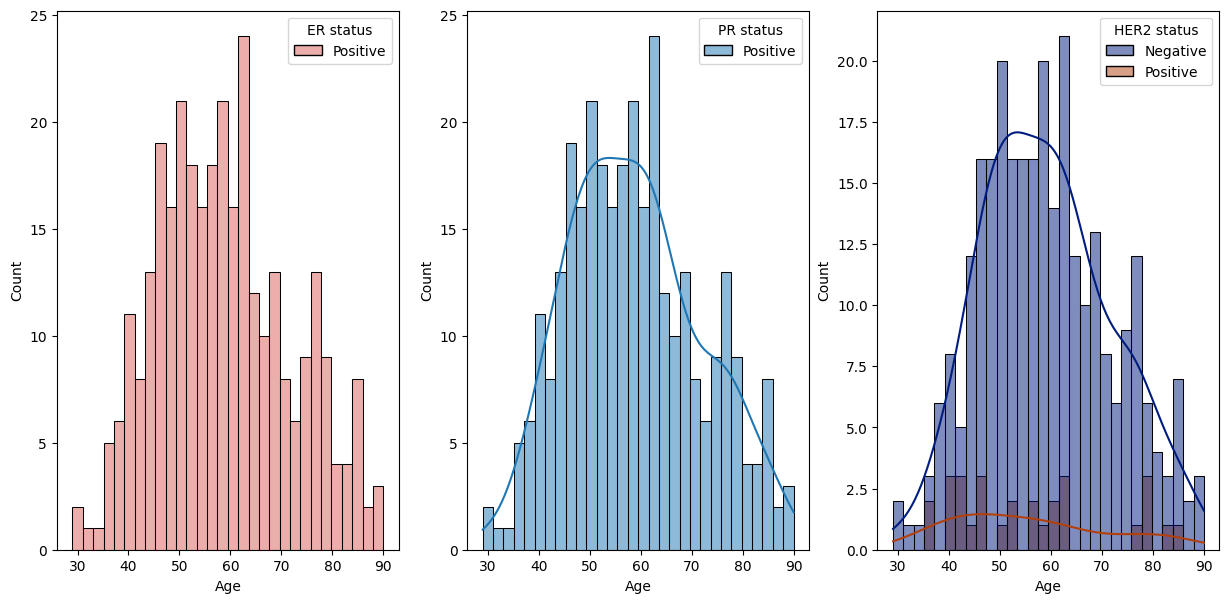

In [71]:
fig,axe = plt.subplots(ncols=3,nrows=1,figsize =(15,7))

sns.histplot(data=df,x = 'Age',bins=30,hue='ER status',ax=axe[0])


sns.histplot(data=df,x = 'Age',bins=30,kde=True,hue='PR status',ax=axe[1],palette='tab10')

sns.histplot(data=df,x = 'Age',bins=30,kde=True,hue='HER2 status',ax=axe[2],palette='dark')
plt.show()

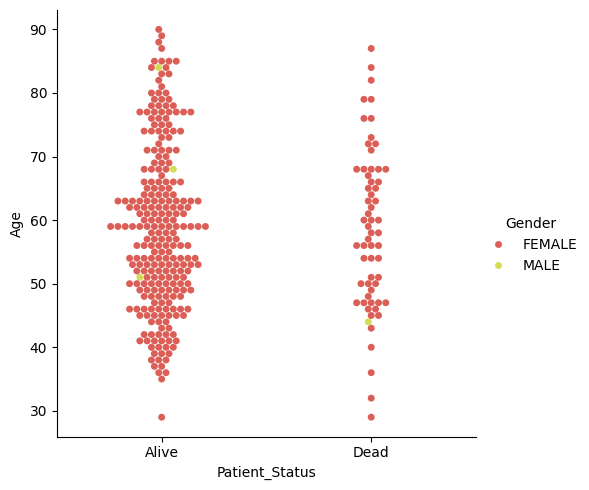

In [79]:
sns.catplot(data=df,x = 'Patient_Status',y = 'Age',kind = 'swarm', hue='Gender')